In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
file_path = R'C:\Users\Vedika Pawar\Downloads\loan.csv' 
data = pd.read_csv(file_path)
print(data)


      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [5]:
# Data Overview
print("\n--- Dataset Overview ---")
print(data.head())



--- Dataset Overview ---
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural         

In [7]:
print("\n--- Dataset Info ---")
data.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
print("\n--- Summary Statistics ---")
print(data.describe())



--- Summary Statistics ---
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [11]:
# Check for missing values
print("\n--- Missing Values ---")
print(data.isnull().sum())



--- Missing Values ---
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [15]:
# Fill missing values
print("\n--- Filling Missing Values ---")
data.fillna(data['Gender'].mode()[0], inplace=True)
data.fillna(data['Married'].mode()[0], inplace=True)
data.fillna(data['Dependents'].mode()[0], inplace=True)
data.fillna(data['Self_Employed'].mode()[0], inplace=True)
data.fillna(data['LoanAmount'].mean(), inplace=True)
data.fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data.fillna(data['Credit_History'].mode()[0], inplace=True)



--- Filling Missing Values ---


In [17]:
# Verify missing values are filled
print("\n--- Missing Values After Filling ---")
print(data.isnull().sum())



--- Missing Values After Filling ---
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64



--- Data Visualization ---


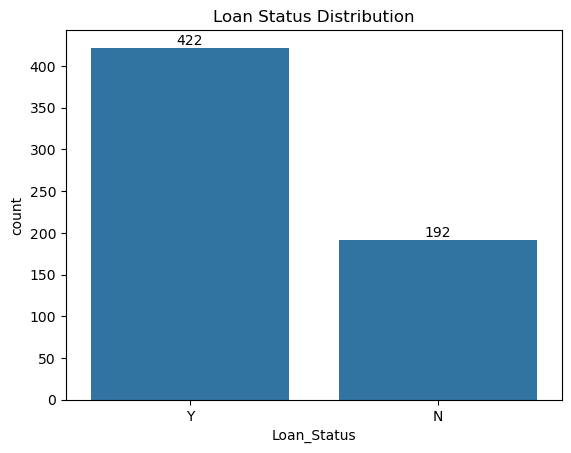

In [17]:
# Data Visualization
print("\n--- Data Visualization ---")
# Create the countplot
ax = sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status Distribution')

# Add counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, int(height), ha="center", va="bottom")          
          
plt.show()


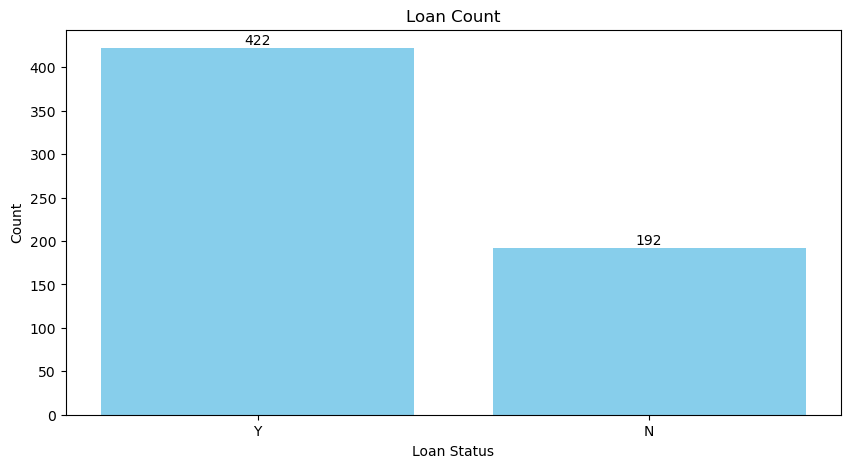

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

count_data = data['Loan_Status'].value_counts().reset_index()
count_data.columns = ["Loan_Status","Count"]

plt.figure(figsize=(10,5))
bars = plt.bar(count_data['Loan_Status'], count_data['Count'], color='skyblue')
plt.title("Loan Count")

# Adding counts on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')


plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()



<Axes: xlabel='Gender', ylabel='count'>

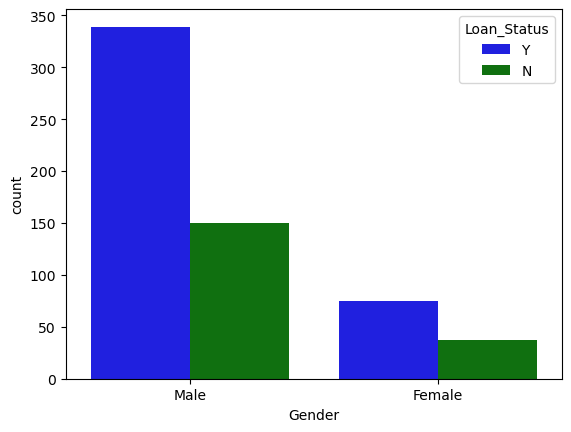

In [3]:
#there is any difference in loan approval rates between male and female applicants. 
sns.countplot(
    x='Gender', 
    data=data, 
    hue='Loan_Status',  # Set hue to Loan_Status to compare Loan Status within each gender
    palette=['blue','green'],
    dodge=True,          # Separate the bars for different Loan_Status within each gender
    legend=True
)


<Axes: xlabel='Credit_History', ylabel='count'>

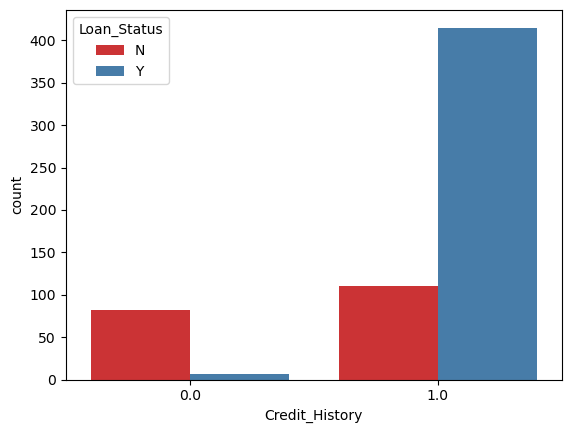

In [25]:
#Does having a good credit history increase the likelihood of loan approval?
sns.countplot(x='Credit_History', hue='Loan_Status', data=data, palette='Set1')

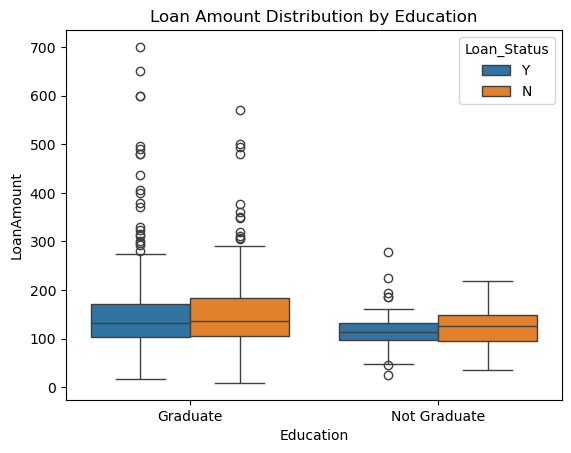

In [27]:
#How does education level affect the loan amount distribution, and how does loan approval #(Loan_Status) influence this?"

#Hue (Loan_Status): The hue parameter distinguishes between loan statuses, typically "Approved" #and "Rejected," and displays two different colored boxes for each education category.


sns.boxplot(x='Education', y='LoanAmount', hue='Loan_Status', data=data)
plt.title('Loan Amount Distribution by Education')
plt.show()


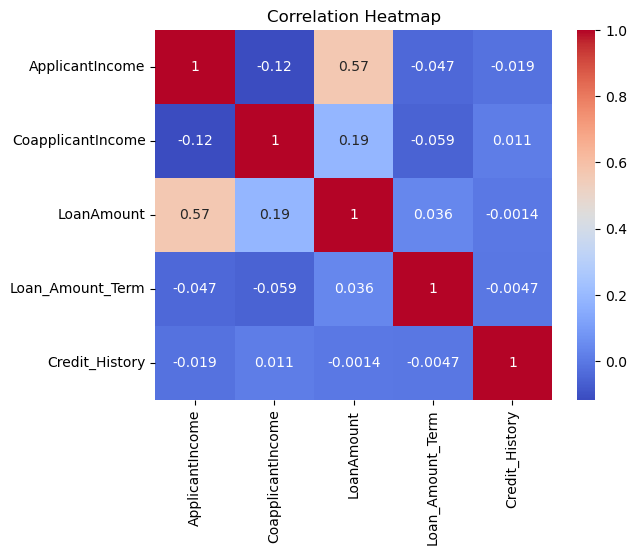

In [29]:
#=============================
# Assuming your dataset is called 'data', select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Filter columns where the standard deviation is greater than 0
numeric_data = numeric_data.loc[:, numeric_data.std() > 0]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Check if the correlation matrix is not empty, and plot the heatmap
if not corr_matrix.empty:
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No valid numeric data available to compute correlations.")

